# Finding the most optimal starter word in Wordle

## I. Creating the Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wordle has a dataset of `12,972` five-letter words that are accepted as guesses in the game. Of those, `2,315` words are in rotation to be the solution to each day's wordle. 

```
accepted.txt - words accepted as guesses
answers.txt -  possible solutions
```

In [2]:
accepted = []
with open('accepted.txt') as f:
    for line in f:
        accepted.append(line.strip())

total_accepted = len(accepted)
print(total_accepted, accepted[0:10])

12972 ['aahed', 'aalii', 'aargh', 'aarti', 'abaca', 'abaci', 'aback', 'abacs', 'abaft', 'abaka']


In [3]:
answers = []
with open('answers.txt') as f:
    for line in f:
        answers.append(line.strip())

total_answers = len(answers)
print(total_answers, answers[0:12])

2315 ['cigar', 'rebut', 'sissy', 'humph', 'awake', 'blush', 'focal', 'evade', 'naval', 'serve', 'heath', 'dwarf']


#### Backtesting function
An optimal starter word allows us to eliminate the maximum number of words from the dataset, narrowing down the list of possible answers. If we used `awake` as our starter word and none of the letters `{a, w, k, e}` were in the wordle's solution, we would still eliminate `77.44%` of all accepted words. 

In [4]:
def backtest(starter, dataset):
    total = len(dataset)
    eliminated = 0
    
    for word in dataset:
        for i in range(5):
            if starter[i] in word:
                eliminated += 1
                break
    pct = round(100 - ((total - eliminated)/total*100), 2)
    return starter, ("{}%".format(pct))

In [5]:
backtest(starter="awake", dataset=accepted)

('awake', '77.44%')

## II. Strategies

#### Vowel Strategy

All English words have at least one vowel (with some exceptions) so a starter word with a lot of vowels should theoretically eliminate the maximum number of words from the dataset.

In [6]:
# converting accepted dataset to one long string
string = ''.join([str(word) for word in accepted])
print(len(string), string[0:50])

64860 aahedaaliiaarghaartiabacaabaciabackabacsabaftabaka


In [7]:
vowels = ['a', 'e', 'i', 'o', 'u']
freq = [string.count(vowels[i]) for i in range(len(vowels))]

vf_dict = {'vowel': vowels, 'frequency': freq}
vf_df = pd.DataFrame(vf_dict) 
vf_df = vf_df.sort_values(by=['frequency'], ascending=False)
vf_df

,vowel,frequency
1,e,6662
0,a,5990
3,o,4438
2,i,3759
4,u,2511


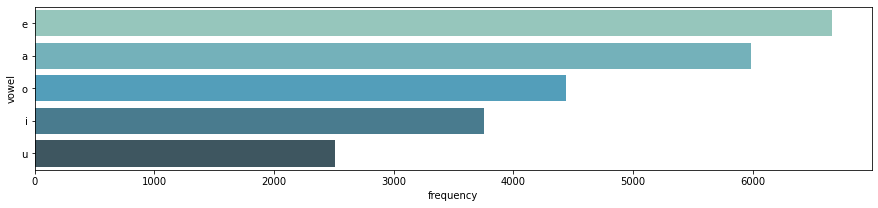

In [8]:
plt.figure(figsize=(15, 3))
sns.barplot(data=vf_df, x="frequency", y="vowel", palette="GnBu_d")
plt.show()

The vowels `e` and `a` are the most frequent in the dataset. Having `e` in the starter word alone would eliminate over `50%` of words. 

In [9]:
for word in accepted:
    if 'a' in word and 'e' in word and 'i' in word and 'o' in word and 'u' in word:
        print(word)

Seeing as none of the words in the `accepted`dataset contain all five vowels, we can try to look for words in the dataset that contain four out of five vowels. Since `e` and `a` are significantly more freqent than the other three, they won't be omitted. 

In [10]:
for word in accepted:
    if ('a' in word and 'e' in word and 'i' in word) and ('o' in word or 'u' in word):
        print(word + ", 1")
        
    if ('a' in word and 'e' in word and 'o' in word) and ('i' in word or 'u' in word):
        print(word + ", 2")
        
    if ('a' in word and 'e' in word and 'u' in word) and ('i' in word or 'o' in word):
        print(word + ", 3")

adieu, 1
adieu, 3
aurei, 1
aurei, 3
uraei, 1
uraei, 3


The first and last conditionals yielded results: `adieu`, `aurei`, and `uraei`. Backtesting them revealed that `aurei` and `uraei` (anagrams of each other) eliminated the largest percentage of the dataset at `93.35%`. 

In [11]:
backtest(starter="adieu", dataset=accepted)

('adieu', '92.18%')

In [12]:
backtest(starter="aurei", dataset=accepted)

('aurei', '93.35%')

In [13]:
backtest(starter="uraei", dataset=accepted)

('uraei', '93.35%')

#### Letter Strategy

Some consonants appear more freqently in words than certain vowels. This is especially true in five-letter words since many of them are plurals of four-letter words, increasing the frequency of the letter `s`.

In [14]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
freq = [string.count(alphabet[i]) for i in range(len(alphabet))]

lf_dict = {'letter': alphabet, 'frequency': freq}
lf_df = pd.DataFrame(lf_dict) 
lf_df = lf_df.sort_values(by=['frequency'], ascending=False)
lf_df

,letter,frequency
18,s,6665
4,e,6662
0,a,5990
14,o,4438
17,r,4158
8,i,3759
11,l,3371
19,t,3295
13,n,2952
20,u,2511


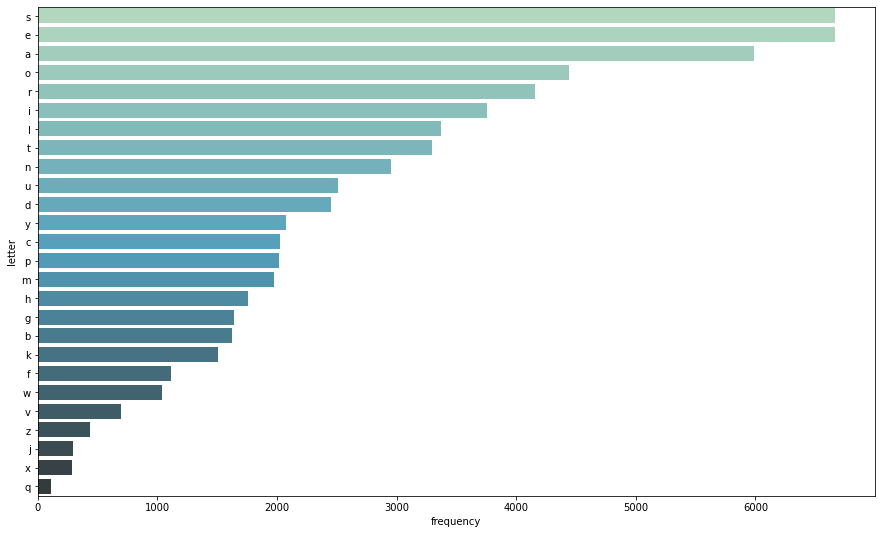

In [15]:
plt.figure(figsize=(15, 9))
sns.barplot(data=lf_df, x="frequency", y="letter", palette="GnBu_d")
plt.show()

Aside from the vowels, `s` and `r` are also very frequent in the dataset. The five most frequent letters are `{s, e, a, o, r}`. There are three words in the dataset containing all five of these letters (making them anagrams). They eliminate `95.55%` of possible words, performing slightly better than the vowel strategy. 

In [16]:
for word in accepted:
    if 's' in word and 'e' in word and 'a' in word and 'o' in word and 'r' in word:
        print(word)

aeros
arose
soare


In [17]:
backtest(starter="aeros", dataset=accepted)

('aeros', '95.55%')

In [18]:
backtest(starter="arose", dataset=accepted)

('arose', '95.55%')

In [19]:
backtest(starter="soare", dataset=accepted)

('soare', '95.55%')

#### Brute Force Strategy

As the `backtest` function was optimized to test all `12,972` words, we can rank the scores of every word in the `accepted` words dataset. `toeas` and `stoae` (anagrams) scored eliminated the most words with `95.72%`, higher than both the vowel and letter strategies. 

In [20]:
data = []

for i in accepted:
    hold = backtest(starter=i, dataset=accepted)
    data.append(hold)

bf = pd.DataFrame(data, columns=['word','% eliminated'])
bf = bf.sort_values(by=['% eliminated'], ascending=False)
bf

,word,% eliminated
11448,toeas,95.72%
10741,stoae,95.72%
317,aloes,95.68%
138,aeons,95.64%
549,arose,95.55%
...,...,...
4147,fuzzy,39.29%
5276,hyphy,38.06%
12683,xylyl,37.66%
4097,fuffy,37.11%


In [21]:
best = bf.word.tolist()
print(best[0:10])

['toeas', 'stoae', 'aloes', 'aeons', 'arose', 'aeros', 'soare', 'reais', 'arise', 'raise']


## III. Conclusion

While we can conclude that `toeas` and `stoae` eliminate the largest percentage of words from the `accepted` words dataset, thereby making them the most optimal starter words, neither appear in the `answers` dataset. This means `toeas` and `stoae` will never be the solution to a wordle and using either as a starter word prevents you from ever guessing the wordle in one attempt.

In [22]:
# repeating brute force strategy with answers dataset
data = []

for i in answers:
    hold = backtest(starter=i, dataset=answers)
    data.append(hold)

bf_ans = pd.DataFrame(data, columns=['word','% eliminated'])
bf_ans = bf_ans.sort_values(by=['% eliminated'], ascending=False)
bf_ans

,word,% eliminated
560,arise,92.74%
1668,raise,92.74%
112,alone,92.18%
1252,arose,92.1%
1589,audio,91.79%
...,...,...
96,civic,46.05%
1209,puppy,44.41%
514,mummy,42.76%
253,vivid,42.63%


While `arise` and `raise` both have a lower percentage of words eliminated when compared to `toeas` and `stoae`, they are present in the `answers` dataset and are in rotation to be the solution to a wordle sometime in the future.

In [23]:
best_ans = bf_ans.word.tolist()
print(best_ans[0:10])

['arise', 'raise', 'alone', 'arose', 'audio', 'atone', 'ratio', 'irate', 'aisle', 'alert']
